# Display Profits

Create an Interactive Widget of Rectbin Graphs showing the Profits for every change of State

### Input Variables:

$\mathbf{P}$ Matrix with Profits  

$\textbf{Feas}$ Index of Feasible Changes in Labour State  

$\mathbb{D}$ Demand Shocks  

$C$ Array with Colours used in Rectbin Graph

### Output Variables:

$\text{Widg}$ Interactive Widget with a Rectbin Graph for each Demand with Profits for each change in State

## Function:

In [1]:
using Interact

function Profits(P::Array{Array{Float64,2},1},F::(Array{Array{Int64,1},1},Array{Array{Int64,1},1}),D::Array{Float64,1};colour=["white","gray","black"])
    
    """Create an Interactive Widget 
    of Rectbin Graphs showing the Profits 
    for every change of State

    Parameters
    ----------
    P : Matrix with Profits
    F : Index of Feasible Changes in Labour State
    D : Demand Shocks
    colour: Array with Colours used in Rectbin Graph
    
    Output
    ----------
    Widg: Interactive Widget with a Rectbin Graph for each Demand with Profits for each change in State

    """
    
    y=[F[1]...];
    x=[F[2]...];

    Prof=Array(Float64,length(D),length(x));

    for i=1:length(x), j=1:length(D)
        
        Prof[j,i]=P[y[i]][j,sum(y[1:i].==y[i])];
    
    end
    
    @manipulate for d=1:length(D) 

        plot(x=x, y=y, color=collect(Prof[d,:]),
        Scale.ContinuousColorScale(Scale.lab_gradient(color(colour[1]),color(colour[2]),color(colour[3])),
        minvalue=floor(minimum(Prof)), maxvalue=ceil(maximum(Prof))),
        Guide.ylabel("L Today"),
        Guide.xlabel("L Tomorrow"),
        Guide.title("Profit for Demand = $(D[d])"),
        Guide.colorkey("Profit"),
        Guide.xticks(ticks=[0:25:size(P,1)]),
        Guide.yticks(ticks=[0:25:size(P,1)]),
        Geom.rectbin)
        
    end
    
end

Profits (generic function with 1 method)

## Example

### Parameters:

In [2]:
import LabourDP

G=3;
N=3;

# Create Wages

α₁=0.8;
β₁=0.1;

W=LabourDP.Wages(G,β₁,α₁);

# Create Production

F_0=0.8;
F_G=1.0;
F̂=1.1;
Ĝ=2;

F=LabourDP.Production(G,F_0,F_G,F̂,Ĝ);

# Create Firing Costs

ϕ=0.2;
S=true;

FC=LabourDP.FiringCost(G,ϕ,S,W);

# Create Demand

M_D=10.;
m_D=5.;
ρ=0.8;
N_D=6;
d=2.;

D=LabourDP.Demand(M_D,m_D,ρ,N_D,d);

# Create Labour Portfolio

fP=LabourDP.fPort(G);

N_G=ceil(Int,M_D/F_G);

L=LabourDP.LabourPortfolio(G,N,N_G,fP);

# Find Feasible Indexes

Feasf=LabourDP.fFeas(G,N);

Feas=LabourDP.FeasibleChoices(Feasf,L);

# Create Profits

Profit=LabourDP.Profits(L,D[1],W,F,FC,Feas);

#### Interactive Widget:

Slider{Int64}([Input{Int64}] 3,"d",3,1:6)

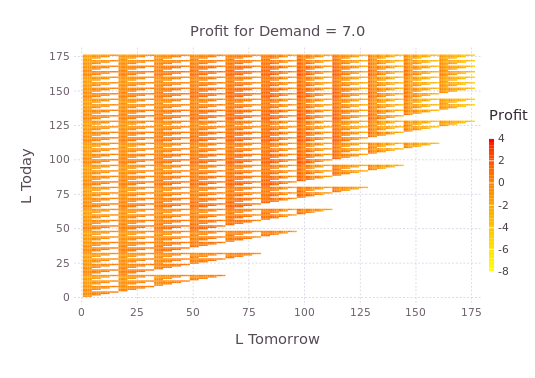

In [3]:
using Gadfly
using Color
using Interact

Profits(Profit,Feas,D[1],colour=["yellow","orange","red"])